In [1]:
import pandas as pd
from prophet import Prophet
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import pickle


In [2]:
path = 'iss-data/csv/us_weekly_consumable_water_summary_20220102-20230903.csv'  # Update with your file path
data = pd.read_csv(path)
data['Date'] = pd.to_datetime(data['Date'])
prophet_data = data[['Date', 'Corrected Total (L)']].rename(columns={'Date': 'ds', 'Corrected Total (L)': 'y'})

In [3]:
split_index = int(len(prophet_data) * 0.8)
train_data = prophet_data[:split_index]
test_data = prophet_data[split_index:]

In [4]:
# Initialize and train the Prophet model
model = Prophet(
    yearly_seasonality=True, 
    weekly_seasonality=True, 
    daily_seasonality=False,
    seasonality_mode='multiplicative',
    changepoint_prior_scale=0.05 
    )
model.fit(train_data)

15:10:47 - cmdstanpy - INFO - Chain [1] start processing
15:10:47 - cmdstanpy - INFO - Chain [1] done processing


In [5]:
# Forecast on the training set and the future
future = model.make_future_dataframe(periods=len(test_data))
forecast = model.predict(future)

In [6]:
print(forecast)

           ds        trend   yhat_lower   yhat_upper  trend_lower  \
0  2022-01-14  4350.178005  4975.590971  5107.345440  4350.178005   
1  2022-01-21  4325.279088  4921.209985  5052.514839  4325.279088   
2  2022-01-28  4300.380171  4843.669730  4975.167366  4300.380171   
3  2022-02-04  4275.481254  4760.033089  4891.792396  4275.481254   
4  2022-02-11  4250.582336  4735.100672  4869.366644  4250.582336   
..        ...          ...          ...          ...          ...   
82 2023-05-19  2627.371970  2820.800101  2947.323192  2627.347594   
83 2023-05-20  2623.901493  2235.234004  2369.049342  2623.874982   
84 2023-05-21  2620.431015  2225.081820  2357.710368  2620.401359   
85 2023-05-22  2616.960538  2222.694080  2345.454051  2616.927050   
86 2023-05-23  2613.490060  2211.780601  2345.369619  2613.452751   

    trend_upper  multiplicative_terms  multiplicative_terms_lower  \
0   4350.178005              0.158766                    0.158766   
1   4325.279088              0.15

/home/trainingmontage/dev/projects/barrios/.venv/lib/python3.11/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/trainingmontage/dev/projects/barrios/.venv/lib/python3.11/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


Text(74.72222222222221, 0.5, 'Water Usage (L)')

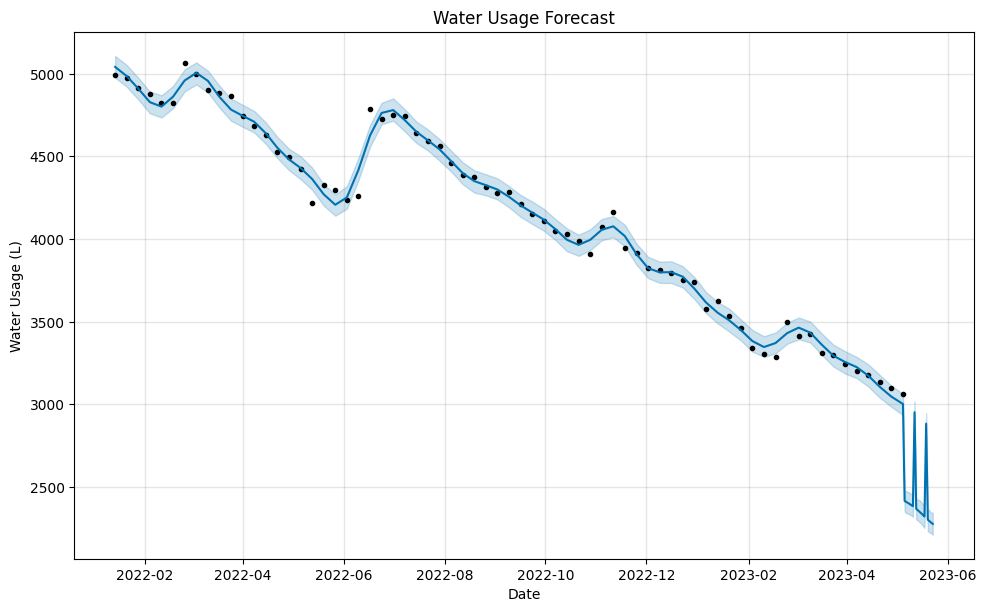

In [7]:
# Plot the forecast
fig1 = model.plot(forecast)
plt.title('Water Usage Forecast')
plt.xlabel('Date')
plt.ylabel('Water Usage (L)')

/home/trainingmontage/dev/projects/barrios/.venv/lib/python3.11/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/trainingmontage/dev/projects/barrios/.venv/lib/python3.11/site-packages/prophet/plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/home/trainingmontage/dev/projects/barrios/.venv/lib/python3.11/site-packages/prophet/plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will

MAE: 326.26558683295775, RMSE: 382.25726216031217


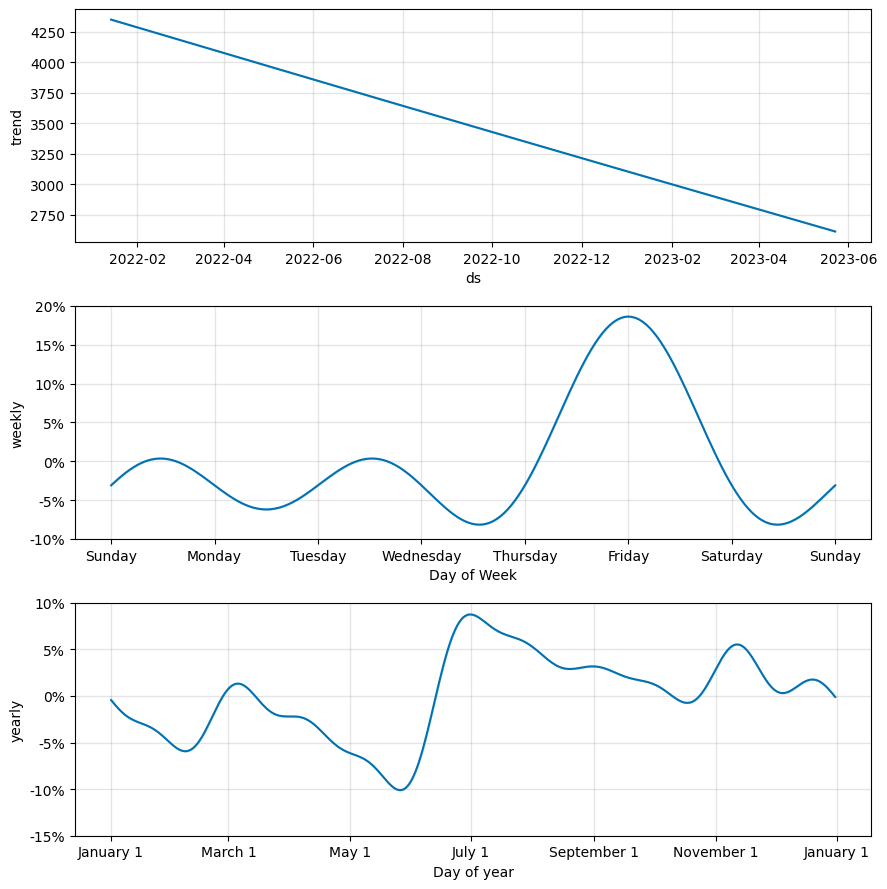

In [8]:
# Show components
fig2 = model.plot_components(forecast)

# Error Analysis on Test Data
test_forecast = forecast.iloc[split_index:]
mae = mean_absolute_error(test_data['y'], test_forecast['yhat'])
rmse = np.sqrt(mean_squared_error(test_data['y'], test_forecast['yhat']))
print(f"MAE: {mae}, RMSE: {rmse}")